# NYX Taxi trip predicton

In [ ]:
import tensorflow

In [1]:
import pandas as pd
df1 = pd.read_csv('NYCTaxiFares.csv')
df = pd.read_csv('taxifare.csv')
df.head()


,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2010-04-19 08:17:56 UTC,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1
1,2010-04-17 15:43:53 UTC,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1
2,2010-04-17 11:23:26 UTC,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2
3,2010-04-11 21:25:03 UTC,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1
4,2010-04-17 02:19:01 UTC,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1


In [2]:
df1.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2010-04-19 08:17:56 UTC,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1
1,2010-04-17 15:43:53 UTC,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1
2,2010-04-17 11:23:26 UTC,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2
3,2010-04-11 21:25:03 UTC,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1
4,2010-04-17 02:19:01 UTC,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1


In [3]:
df.shape

(120000, 8)

In [4]:
# checking features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   pickup_datetime    120000 non-null  object 
 1   fare_amount        120000 non-null  float64
 2   fare_class         120000 non-null  int64  
 3   pickup_longitude   120000 non-null  float64
 4   pickup_latitude    120000 non-null  float64
 5   dropoff_longitude  120000 non-null  float64
 6   dropoff_latitude   120000 non-null  float64
 7   passenger_count    120000 non-null  int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 7.3+ MB


In [5]:
# We are performing feature engineering with respect to date time
import datetime
pd.to_datetime(df['pickup_datetime'])


0        2010-04-19 08:17:56+00:00
1        2010-04-17 15:43:53+00:00
2        2010-04-17 11:23:26+00:00
3        2010-04-11 21:25:03+00:00
4        2010-04-17 02:19:01+00:00
                    ...           
119995   2010-04-18 14:33:03+00:00
119996   2010-04-23 10:27:48+00:00
119997   2010-04-18 18:50:40+00:00
119998   2010-04-13 08:14:44+00:00
119999   2010-04-17 16:00:14+00:00
Name: pickup_datetime, Length: 120000, dtype: datetime64[ns, UTC]

In [6]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])-datetime.timedelta(hours=4)


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   pickup_datetime    120000 non-null  datetime64[ns, UTC]
 1   fare_amount        120000 non-null  float64            
 2   fare_class         120000 non-null  int64              
 3   pickup_longitude   120000 non-null  float64            
 4   pickup_latitude    120000 non-null  float64            
 5   dropoff_longitude  120000 non-null  float64            
 6   dropoff_latitude   120000 non-null  float64            
 7   passenger_count    120000 non-null  int64              
dtypes: datetime64[ns, UTC](1), float64(5), int64(2)
memory usage: 7.3 MB


In [8]:
df.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2010-04-19 04:17:56+00:00,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1
1,2010-04-17 11:43:53+00:00,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1
2,2010-04-17 07:23:26+00:00,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2
3,2010-04-11 17:25:03+00:00,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1
4,2010-04-16 22:19:01+00:00,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1


In [9]:
df['Year'] = df['pickup_datetime'].dt.year
df['Month'] = df['pickup_datetime'].dt.month
df['Days'] = df['pickup_datetime'].dt.day
df['Hours'] = df['pickup_datetime'].dt.hour
df['Minutes'] = df['pickup_datetime'].dt.minute


In [10]:
df.shape

(120000, 13)

In [11]:
df.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Year,Month,Days,Hours,Minutes
0,2010-04-19 04:17:56+00:00,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1,2010,4,19,4,17
1,2010-04-17 11:43:53+00:00,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1,2010,4,17,11,43
2,2010-04-17 07:23:26+00:00,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2,2010,4,17,7,23
3,2010-04-11 17:25:03+00:00,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1,2010,4,11,17,25
4,2010-04-16 22:19:01+00:00,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1,2010,4,16,22,19


In [12]:
import numpy as np
df['mornornight'] = np.where(df['Hours']<12,0,1)
# Adding one hot encoding kind of structure where if less than 12 hours "0" shows morning else "1" is night


In [13]:
df.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Year,Month,Days,Hours,Minutes,mornornight
0,2010-04-19 04:17:56+00:00,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1,2010,4,19,4,17,0
1,2010-04-17 11:43:53+00:00,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1,2010,4,17,11,43,0
2,2010-04-17 07:23:26+00:00,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2,2010,4,17,7,23,0
3,2010-04-11 17:25:03+00:00,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1,2010,4,11,17,25,1
4,2010-04-16 22:19:01+00:00,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1,2010,4,16,22,19,1


In [14]:
df.drop('pickup_datetime',axis=1,inplace=True)

In [15]:
df.head()

,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Year,Month,Days,Hours,Minutes,mornornight
0,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1,2010,4,19,4,17,0
1,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1,2010,4,17,11,43,0
2,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2,2010,4,17,7,23,0
3,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1,2010,4,11,17,25,1
4,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1,2010,4,16,22,19,1


In [16]:
df['fare_class'].unique()

array([0, 1])

In [17]:
from sklearn.metrics.pairwise import haversine_distances
from math import radians
newdelhi=[28.6139,77.2090]
bangalore=[12.9716,77.5946]


In [18]:
newdelhi_in_radians = [radians(_) for _ in newdelhi]
bangalore_in_radians = [radians(_) for _ in bangalore]
result = haversine_distances([newdelhi_in_radians,bangalore_in_radians])

In [19]:
result

array([[0.        , 0.27308148],
       [0.27308148, 0.        ]])

In [20]:
##Just multiplying result by radius of earth
result*6371

array([[   0.       , 1739.8021019],
       [1739.8021019,    0.       ]])

In [21]:
import numpy as np
def haversine(df):
    """
    Calculate the great circle distance in kilometers between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lat1 = np.radians(df["pickup_latitude"])
    lat2 = np.radians(df["pickup_longitude"])

    # haversine formula 
    dlat =np.radians(df["dropoff_latitude"]-df["pickup_latitude"]) 
    dlon = np.radians(df["dropoff_longitude"]-df["pickup_longitude"])
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arctan2(np.sqrt(a),np.sqrt(1-a)) 
    r = 6371 # Radius of earth in kilometers. Use 3956 for miles. Determines return value units.
    return c * r


In [22]:
df['Total_distance']=haversine(df)

In [23]:
df.head()

,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Year,Month,Days,Hours,Minutes,mornornight,Total_distance
0,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1,2010,4,19,4,17,0,1.799143
1,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1,2010,4,17,11,43,0,0.897284
2,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2,2010,4,17,7,23,0,2.413730
3,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1,2010,4,11,17,25,1,1.340764
4,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1,2010,4,16,22,19,1,4.433896


In [24]:
df.drop(["dropoff_latitude","dropoff_longitude","pickup_latitude","pickup_longitude"],axis=1,inplace=True)

In [25]:
df.head()

,fare_amount,fare_class,passenger_count,Year,Month,Days,Hours,Minutes,mornornight,Total_distance
0,6.5,0,1,2010,4,19,4,17,0,1.799143
1,6.9,0,1,2010,4,17,11,43,0,0.897284
2,10.1,1,2,2010,4,17,7,23,0,2.413730
3,8.9,0,1,2010,4,11,17,25,1,1.340764
4,19.7,1,1,2010,4,16,22,19,1,4.433896


# Storing Data in MongoDB

In [26]:
import json
records = json.loads(df.T.to_json()).values()

In [27]:
!pip install pymongo

In [28]:
import pymongo
client = pymongo.MongoClient('mongodb://localhost:27017/')
db = client["newyorktaxi"]
col = db["rides"]

In [29]:
col.insert_many(records)

# Use of Regression model

In [30]:
X = df.iloc[:,1:]
Y = df.iloc[:,0]


In [31]:
#feature importance
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(X,Y)

ExtraTreesRegressor()

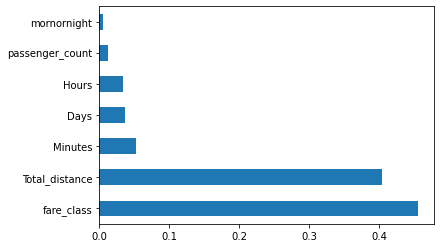

In [32]:
### Plot graph of feature importances for better visualisation 
ft_importance = pd.Series(model.feature_importances_, index=X.columns)
ft_importance.nlargest(7).plot(kind='barh')
plt.show()

In [33]:
X.head()


,fare_class,passenger_count,Year,Month,Days,Hours,Minutes,mornornight,Total_distance
0,0,1,2010,4,19,4,17,0,1.799143
1,0,1,2010,4,17,11,43,0,0.897284
2,1,2,2010,4,17,7,23,0,2.413730
3,0,1,2010,4,11,17,25,1,1.340764
4,1,1,2010,4,16,22,19,1,4.433896


In [34]:
Y.head()

0     6.5
1     6.9
2    10.1
3     8.9
4    19.7
Name: fare_amount, dtype: float64

In [35]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=100)


In [36]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [37]:
import xgboost

In [38]:
regressor = xgboost.XGBRegressor()
regressor.fit(X_train,Y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [39]:
y_pred = regressor.predict(X_test)

In [40]:
import matplotlib.pyplot as plt


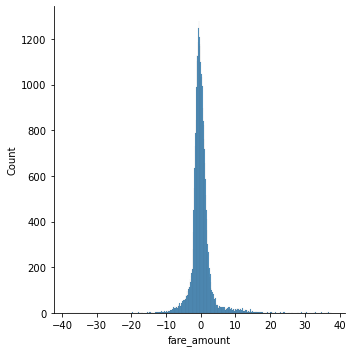

In [41]:
import seaborn as sns
sns.displot(Y_test-y_pred)
##If you get this kind of gausian distribution between the y test and y pred it indicates that the model is pretty
##good

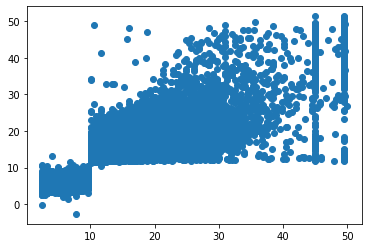

In [42]:
plt.scatter(Y_test,y_pred)

In [43]:
from sklearn import metrics
print('R-Square :',np.sqrt(metrics.r2_score(Y_test,y_pred)))
print('MAE:',metrics.mean_absolute_error(Y_test,y_pred))
print('MSE:',metrics.mean_squared_error(Y_test,y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(Y_test,y_pred)))

R-Square : 0.9005805874007166
MAE: 1.8268935370571413
MSE: 10.809313593001193
RMSE: 3.2877520577137798


# Hyperparameter Tuning

In [44]:
from sklearn.model_selection import RandomizedSearchCV

In [45]:
n_estimators = [int(x) for x in np.linspace(start=100,stop=1200,num=12)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [46]:
#Randomized Search CV

#Number of trees in Xgboost
n_estimators = [int(x) for x in np.linspace(start=100,stop=1200,num=12)]
#Various learning rates
learning_rate=['0.05','0.1','0.2','0.3','0.4','0.5','0.6']
#Max number of levels in tree
max_depth = [int(x) for x in np.linspace(5,30,num=6)]
# minimum child weight parameter
min_child_weight=[3,4,5,6,7]
#subsample param values
subsample=[0.7,0.6,0.5,0.4]

In [47]:
#Random Grid
random_grid = {'n_estimators':n_estimators,
               'learning_rate':learning_rate,
               'max_depth':max_depth,
               'min_child_weight':min_child_weight,
               'subsample':subsample}
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'learning_rate': ['0.05', '0.1', '0.2', '0.3', '0.4', '0.5', '0.6'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_child_weight': [3, 4, 5, 6, 7], 'subsample': [0.7, 0.6, 0.5, 0.4]}


In [48]:
# Use random grid to search for best param and search across 100 different combinations,
regressor = xgboost.XGBRegressor()

In [84]:
#Random search of parameters using 3 fold cross validation, search across 100 diff. combos
xg_random = RandomizedSearchCV(estimator=regressor,param_distributions=random_grid,scoring='neg_mean_squared_error',n_iter=3,cv=5,verbose=2,random_state=42,n_jobs=1)

In [85]:
xg_random.fit(X_train,Y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV] subsample=0.5, n_estimators=600, min_child_weight=4, max_depth=5, learning_rate=0.5 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  subsample=0.5, n_estimators=600, min_child_weight=4, max_depth=5, learning_rate=0.5, total=   9.7s
[CV] subsample=0.5, n_estimators=600, min_child_weight=4, max_depth=5, learning_rate=0.5 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    9.7s remaining:    0.0s


[CV]  subsample=0.5, n_estimators=600, min_child_weight=4, max_depth=5, learning_rate=0.5, total=  10.4s
[CV] subsample=0.5, n_estimators=600, min_child_weight=4, max_depth=5, learning_rate=0.5 
[CV]  subsample=0.5, n_estimators=600, min_child_weight=4, max_depth=5, learning_rate=0.5, total=  10.9s
[CV] subsample=0.5, n_estimators=600, min_child_weight=4, max_depth=5, learning_rate=0.5 
[CV]  subsample=0.5, n_estimators=600, min_child_weight=4, max_depth=5, learning_rate=0.5, total=  11.3s
[CV] subsample=0.5, n_estimators=600, min_child_weight=4, max_depth=5, learning_rate=0.5 
[CV]  subsample=0.5, n_estimators=600, min_child_weight=4, max_depth=5, learning_rate=0.5, total=  10.5s
[CV] subsample=0.7, n_estimators=1200, min_child_weight=5, max_depth=20, learning_rate=0.05 
[CV]  subsample=0.7, n_estimators=1200, min_child_weight=5, max_depth=20, learning_rate=0.05, total=61.5min
[CV] subsample=0.7, n_estimators=1200, min_child_weight=5, max_depth=20, learning_rate=0.05 
[CV]  subsample=

[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed: 72.2min finished


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n...
                                          validate_parameters=None,
                                          verbosity=None),
                   n_iter=3, n_jobs=1,
                   param

In [86]:
xg_random.best_params_

{'subsample': 0.7,
 'n_estimators': 1200,
 'min_child_weight': 5,
 'max_depth': 20,
 'learning_rate': '0.05'}

In [88]:
y_pred = xg_random.predict(X_test)

/Users/adityagaikwad/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='fare_amount', ylabel='Density'>

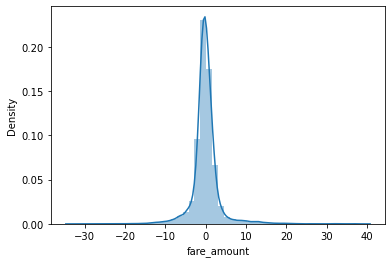

In [89]:
sns.distplot(Y_test-y_pred)

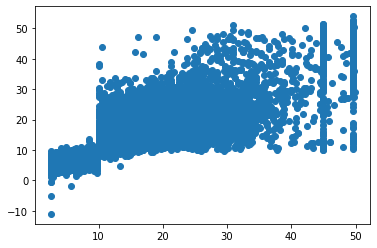

In [90]:
plt.scatter(Y_test,y_pred)

In [91]:
from sklearn import metrics
print('R-Square :',np.sqrt(metrics.r2_score(Y_test,y_pred)))
print('MAE:',metrics.mean_absolute_error(Y_test,y_pred))
print('MSE:',metrics.mean_squared_error(Y_test,y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(Y_test,y_pred)))

R-Square : 0.8787570971343113
MAE: 2.0323929745915534
MSE: 13.030695450544105
RMSE: 3.609805458822415
